# Starting Off

How does sklearn utilize numpy?

## Let's play with Hyperparameter tuning

[Google Playground](https://developers.google.com/machine-learning/crash-course/introduction-to-neural-networks/playground-exercises)

## Hyperparameter Tuning 

    


- **Number of Hidden Layers**

*For many problems you can start with just one or two hidden layers it will work just fine. For more complex problems, you can gradually ramp up the number of hidden layers until your model starts to over fit. Very complex tasks, like image classification, will need dozens of layers.*


- **Number of Neurons per layer**

*The number of nuerons for the input and output layers are dependent on your data and the task. For hiddne layers, a common practice is to create a funnel with funnel with fewer and fewer neurons per layer.*

*In general, you will get more bang for your buck by adding on more layers than adding more neurons.*

- **[Activation Functions](https://towardsdatascience.com/exploring-activation-functions-for-neural-networks-73498da59b02)**
    - Linear
    - Sigmoid
    - Softmax
    - Tanh
    - ReLu
    - elu
    
*In most cases you can use the ReLu activation function (or one of its variants) in the hidden layers. For the output layer, the softmax activation function is generally good for multiclass problems and the sigmouid function for binary classificatin problems. For regression tasks, you can simply use no activation function at all*

- [Selecting an optimizer](https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/)
    - Adam
    - SGD
    - RMSprop
    - Adagrad



- **Learning Rate**
![learningrate](learningrate.png)
*If you set it too low, training will eventually converge, but it will do so slowly.*
*If you set it too high, it might acutally diverge.*
*If you set it slightly too high, it will converge at first but miss the local optima.*


- **Regularization** 
    - L1 and L2
    - Dropout
    
    *the most popular techniqure for deep neural networks. It is a fairly simple algorithm where at every training step, every neuron has a probability fo being teporarily "droppedout," meaning it will be completely ignored dureing this traing step, but it may be active during the next step.*
    
    - [Early Stopping](https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/)
    
    *Just intterupt training whne its performance on the validation set starts dropping*
    
    


[Paper on selecting hyperparameters](https://arxiv.org/pdf/1206.5533v2.pdf)

# Fitting a Model with Keras

## Import  Modules 

In [1]:
# Create first network with Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from keras.optimizers import SGD
import pandas as pd
import numpy


Using TensorFlow backend.


In [2]:
# load pima indians dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv",header=None, delimiter=",")
# split into input (X) and output (Y) variables

In [3]:
dataset

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X = dataset.iloc[:,0:8]
y = dataset.iloc[:,8]
#scale models?
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Define Model
Models in Keras are defined as a sequence of layers.

We create a Sequential model and add layers one at a time until we are happy with our network topology.

In [49]:
model = Sequential()

#create first hidden layer
model.add(Dense(12, input_dim=8, activation='relu'))
#adding in regularization via Dropout
model.add(Dropout(0.25))
# Add fully connected layer with a ReLU activation function and L2 regularization
model.add(Dense(units=16, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
#Final Layer
model.add(Dense(1, activation='sigmoid'))

In [50]:
network = Sequential()

# Add a dropout layer for input layer
network.add(Dropout(0.2, input_shape=(8,)))
# Add fully connected layer with a ReLU activation function
network.add(Dense(units=16, activation='relu'))
# Add a dropout layer for previous hidden layer
network.add(Dropout(0.25))
# Add fully connected layer with a ReLU activation function and L2 regularization
network.add(Dense(units=16, kernel_regularizer=regularizers.l2(0.01),activation='relu'))
#Final Layer
network.add(Dense(1, activation='sigmoid'))

[Using GridSearchCV to tune Neural Networks](https://chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparameters/)

### Visualize Network Architecture


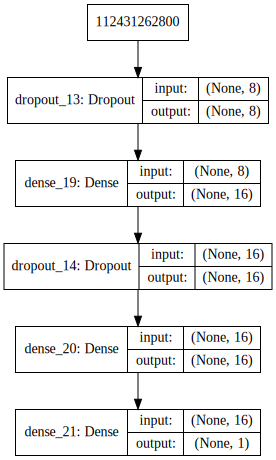

In [51]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model


#Visualize network architecture
SVG(model_to_dot(network, show_shapes=True).create(prog='dot', format='svg'))


In [52]:
# Save the visualization as a file
plot_model(network, show_shapes=True, to_file='network.png')

https://chrisalbon.com/deep_learning/keras/visualize_neural_network_architecture/

## Compile model


In [54]:

model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [55]:
network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

[Keras Implementation of optimizers](https://keras.io/optimizers/)

[Impact of Learning Rate on MOdel Performance](https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/)

In [56]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=3),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [62]:
# Train neural network
#put call back in...
history = network.fit(X_train, # Features
                      y_train, # Target
                      epochs=15, # Number of epochs
                      callbacks=callbacks, #early stopping
                      verbose=2, # Some output
                      batch_size=100, # Number of observations per batch
                      validation_data=(X_test, y_test)) # Data for evaluation

Train on 514 samples, validate on 254 samples
Epoch 1/15
 - 0s - loss: 1.8167 - acc: 0.5875 - val_loss: 1.4204 - val_acc: 0.5945
Epoch 2/15
 - 0s - loss: 2.0650 - acc: 0.5584 - val_loss: 1.3649 - val_acc: 0.5906
Epoch 3/15
 - 0s - loss: 2.1488 - acc: 0.5447 - val_loss: 1.3205 - val_acc: 0.5984
Epoch 4/15
 - 0s - loss: 1.9060 - acc: 0.5564 - val_loss: 1.2480 - val_acc: 0.6024
Epoch 5/15
 - 0s - loss: 1.7607 - acc: 0.5545 - val_loss: 1.1597 - val_acc: 0.6024
Epoch 6/15
 - 0s - loss: 1.5215 - acc: 0.5681 - val_loss: 1.1390 - val_acc: 0.5945
Epoch 7/15
 - 0s - loss: 1.6142 - acc: 0.5603 - val_loss: 1.1641 - val_acc: 0.6299
Epoch 8/15
 - 0s - loss: 1.8487 - acc: 0.5253 - val_loss: 1.0721 - val_acc: 0.6102
Epoch 9/15
 - 0s - loss: 1.7665 - acc: 0.4844 - val_loss: 1.0104 - val_acc: 0.5984
Epoch 10/15
 - 0s - loss: 1.6884 - acc: 0.5097 - val_loss: 0.9917 - val_acc: 0.6063
Epoch 11/15
 - 0s - loss: 1.5892 - acc: 0.5525 - val_loss: 0.9890 - val_acc: 0.6024
Epoch 12/15
 - 0s - loss: 1.6627 - acc:

In [59]:
score = model.evaluate(X_test, y_test, batch_size=128)


254/254 [==============================] - 0s 344us/step


In [60]:
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))


acc: 48.03%


In [36]:
# calculate predictions
predictions = model.predict(X_test)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

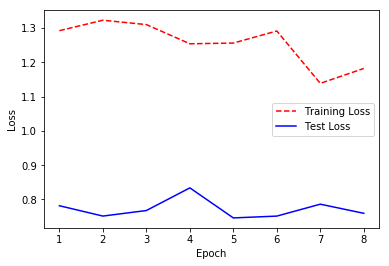

In [37]:
import matplotlib.pyplot as plt

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

https://chrisalbon.com/deep_learning/keras/visualize_loss_history/

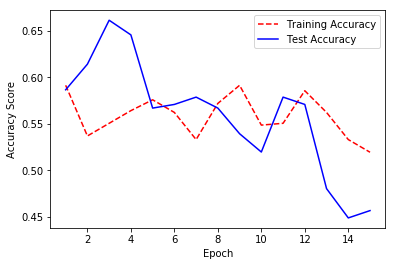

In [27]:
# Get training and test accuracy histories
training_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize accuracy history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.show();

https://chrisalbon.com/deep_learning/keras/visualize_performance_history/

In [20]:




# calculate predictions
predictions = model.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

## Resources 

http://neuralnetworksanddeeplearning.com/
    
http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/

https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi